## 문제 1. 스타벅스 매장의 이름과 주소, 구 이름 찾기

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
import pandas as pd
import time

In [2]:
driver = webdriver.Chrome('driver/chromedriver.exe')
driver.get('https://www.starbucks.co.kr/store/store_map.do')

In [3]:
time.sleep(2)

In [4]:
driver.find_element(By.CSS_SELECTOR, '#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a').click()

In [5]:
time.sleep(2)

In [6]:
driver.find_element(By.CSS_SELECTOR, '#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a').click()

In [7]:
time.sleep(4)

In [8]:
driver.find_element(By.CSS_SELECTOR, '#mCSB_2_container > ul > li:nth-child(1) > a').click()

In [9]:
time.sleep(2)

In [10]:
content = driver.page_source
content

'<html lang="ko"><head>\n\t\t\n\n\n\n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta charset="utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no">\n<meta property="og:type" content="website">\n<meta property="og:title" content="Starbucks">\n<meta property="og:url" content="https://www.starbucks.co.kr/">\n<meta property="og:image" content="https://image.istarbucks.co.kr/common/img/kakaotalk.png">\n<meta property="og:description" content="Starbucks">\n\n<title id="titleJoin">Starbucks Korea</title><script src="https://connect.facebook.net/ko_KR/sdk.js?hash=7d0563fd2dbd42bd78776c02e12ba228" async="" crossorigin="anonymous"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-WC8Q3C59QP&amp;cx=c&amp;_slc=1"></script><script id="facebook-jssdk" src="//connect.facebook.net/ko_KR/sdk.js"></script><script async="" src="//www.google-analytics.c

In [11]:
# BeautifulSoup을 사용하여 파싱
soup = BeautifulSoup(content, 'html.parser')

In [12]:
# 매장명
title = soup.find_all('li', class_ = 'quickResultLstCon')[2].get('data-name')
title

'역삼아레나빌딩'

In [13]:
# 위도 경도
lat = soup.find_all('li', class_ = 'quickResultLstCon')[2].get('data-lat')
lng = soup.find_all('li', class_ = 'quickResultLstCon')[2].get('data-long')
lat, lng


('37.501087', '127.043069')

In [14]:
# 구
# 주의 진행하는곳 위치 정보에 따라서 파라메터값 바꿔줘야함
address = soup.find_all('p', class_ = 'result_details')[2].text
tam = re.split(' ', address)
gu = tam[1]
gu

'강남구'

In [15]:
# 구
# 주의 진행하는곳 위치 정보에 따라서 파라메터값 바꿔줘야함
address = soup.select('.result_details')[2].contents[0].text
address


'서울특별시 강남구 언주로 425 (역삼동)'

In [16]:
dress = soup.find_all('p', class_ = 'result_details')
len(dress)

613

In [17]:
# 주소 
# 주의 진행하는곳 위치 정보에 따라서 파라메터값 바꿔줘야함
adr = soup.find_all('p', class_ = 'result_details')[2].text
tam = re.split(' ', adr)
tam[:4]
address =  tam[0]+ ' ' + tam[1] + ' ' + tam[2] + ' ' + tam[3]
address

'서울특별시 강남구 언주로 425'

In [18]:
# 구 이름

In [19]:
# 홈페이지를 크롤링함
content = driver.page_source

# bs4를 사용하여 파싱
soup = BeautifulSoup(content, 'html.parser')

# for문 범위 설정용
dress = soup.find_all('p', class_ = 'result_details')
len(dress)


# 데이터 프레임 만들기 위한 컬럼 만들기
title = []
address = []
gu = []
lat = []
lng = []

for i in tqdm(range(2, len(dress))):
    title.append(soup.find_all('li', class_ = 'quickResultLstCon')[i].get('data-name'))
    lat.append(soup.find_all('li', class_ = 'quickResultLstCon')[i].get('data-lat'))
    lng.append(soup.find_all('li', class_ = 'quickResultLstCon')[i].get('data-long'))
    adr = soup.select('.result_details')[i].contents[0].text
    tam = re.split(' ', adr)
    dress =  tam[0]+ ' ' + tam[1] + ' ' + tam[2] + ' ' + tam[3]
    address.append(dress)
    gu.append(tam[1])



100%|████████████████████████████████████████████████████████████████████████████████| 611/611 [00:52<00:00, 11.63it/s]


In [20]:
len(title), len(address), len(gu), len(lat), len(lng)

(611, 611, 611, 611, 611)

In [21]:
address

['서울특별시 강남구 언주로 425',
 '서울특별시 강남구 강남대로 538',
 '서울특별시 강남구 강남대로 584',
 '서울특별시 강남구 테헤란로 125',
 '서울특별시 강남구 남부순환로 2947',
 '서울특별시 강남구 봉은사로 619',
 '서울특별시 강남구 논현로 834',
 '서울특별시 강남구 영동대로 513',
 '서울특별시 강남구 테헤란로 518',
 '서울특별시 강남구 언주로 861',
 '서울특별시 강남구 광평로 281',
 '서울특별시 강남구 남부순환로 2621',
 '서울특별시 강남구 테헤란로 409',
 '서울특별시 강남구 봉은사로 446',
 '서울특별시 강남구 봉은사로2길 39',
 '서울특별시 강남구 영동대로 513',
 '서울특별시 강남구 학동로 419',
 '서울특별시 강남구 도곡로 205',
 '서울특별시 강남구 강남대로 390',
 '서울특별시 강남구 도곡로 457',
 '서울특별시 강남구 영동대로 720',
 '서울특별시 강남구 압구정로30길 17',
 '서울특별시 강남구 가로수길 59',
 '서울특별시 강남구 도산대로57길 24',
 '서울특별시 강남구 강남대로 328',
 '서울특별시 강남구 도산대로 328',
 '서울특별시 강남구 삼성로 402',
 '서울특별시 강남구 테헤란로 505',
 '서울특별시 강남구 논현로 752',
 '서울특별시 강남구 도산대로 108',
 '서울특별시 강남구 남부순환로 2909',
 '서울특별시 강남구 언주로 650',
 '서울특별시 강남구 도산대로 458',
 '서울특별시 강남구 도곡로 408,',
 '서울특별시 강남구 역삼로 123',
 '서울특별시 강남구 영동대로 513',
 '서울특별시 강남구 논현로175길 94,',
 '서울특별시 강남구 테헤란로 211,',
 '서울특별시 강남구 테헤란로 134,',
 '서울특별시 강남구 강남대로 456,',
 '서울특별시 강남구 도산대로 532,',
 '서울특별시 강남구 테헤란로87길 33',
 '서울특별시 강남구 영동대로86길 12,',


스타벅스 매장의 이름과 주소, 구 이름

In [23]:
star_df = pd.DataFrame({'매장명':title, '주소': address, '구':gu, 'lat': lat, 'lng': lng})

In [24]:
star_df

,매장명,주소,구,lat,lng
0,역삼아레나빌딩,서울특별시 강남구 언주로 425,강남구,37.501087,127.043069
1,논현역사거리,서울특별시 강남구 강남대로 538,강남구,37.510178,127.022223
2,신사역성일빌딩,서울특별시 강남구 강남대로 584,강남구,37.5139309,127.0206057
3,국기원사거리,서울특별시 강남구 테헤란로 125,강남구,37.499517,127.031495
4,대치재경빌딩R,서울특별시 강남구 남부순환로 2947,강남구,37.494668,127.062583
...,...,...,...,...,...
606,사가정역,서울특별시 중랑구 면목로 310,중랑구,37.579594,127.087966
607,상봉역,서울특별시 중랑구 망우로 307,중랑구,37.59689,127.08647
608,묵동,서울특별시 중랑구 동일로 952,중랑구,37.615368,127.076633
609,양원역,서울특별시 중랑구 양원역로10길 3,중랑구,37.6066536267232,127.106359790053


In [ ]:
# star_df.to_csv('backup\starbucks.csv', sep=',', encoding='utf-8')

In [25]:
driver.quit()

In [290]:
star_df['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

## 문제 2. 이디야 매장의 이름과 주소, 구 이름 찾기

서울시의 이디야커피 매장이름과 주소 구 찾기

In [292]:
driver = webdriver.Chrome('driver/chromedriver.exe')
driver.get('https://ediya.com/contents/find_store.html')

In [293]:
driver.find_element(By.CSS_SELECTOR, '#contentWrap > div.contents > div > div.store_search_pop > ul > li:nth-child(2) > a').click()

In [28]:
# 데이터 프레임 만들기 위한 컬럼 만들기
ediya_title = []
ediya_address = []
ediya_gu = []
ediya_lat = []
ediya_lng = []

#### 테스트

In [ ]:
keyword = driver.find_element(By.CSS_SELECTOR, '#keyword')
keyword.clear()
keyword.send_keys('강동구')

In [ ]:
driver.find_element(By.CSS_SELECTOR, '#keyword_div > form > button').click()

In [ ]:
# 팝업창 제거
# driver.find_element(By.CSS_SELECTOR, '#map > div:nth-child(1) > div > div:nth-child(6) > div:nth-child(24) > div > div > div.st_info_top > div > a > img').click()

In [ ]:
kd_content = driver.page_source
kd_content

In [ ]:
soup = BeautifulSoup(kd_content, 'html.parser')

In [35]:
soup.find_all('dl')

[<dl>
 <dt>매장주소</dt>
 <dd>서울특별시 강남구 논현로 636</dd>
 </dl>,
 <dl>
 <dt>전화번호</dt>
 <dd>02-545-6467</dd>
 </dl>,
 <dl>
 <dt>영업시간</dt>
 <dd>평일 운영시간: 01:30~02:00<br/>주말 및 공휴일에는 변경될 수 있습니다.</dd>
 </dl>,
 <dl class="line">
 <dt>매장위치</dt>
 <dd>강남 논현동 221-17 이디야 빌딩에 위치. 9호선 언주역 3번 출구 도보 6분, 7호선 학동 3번 출구 도보 8분</dd>
 </dl>,
 <dl><dt>가오리역점</dt> <dd>서울 강북구 삼각산로 108 (수유동)</dd></dl>,
 <dl><dt>광산사거리점</dt> <dd>서울 강북구 노해로 91 (수유동, 진흥빌딩)</dd></dl>,
 <dl><dt>미아꿈의숲해링턴점</dt> <dd>서울 강북구 오현로 45 (미아동, 꿈의숲 해링턴 플레이스)</dd></dl>,
 <dl><dt>미아역점</dt> <dd>서울 강북구 도봉로 207 -3(미아동)</dd></dl>,
 <dl><dt>미아중앙점</dt> <dd>서울 강북구 도봉로 128 (미아동)</dd></dl>,
 <dl><dt>번동점</dt> <dd>서울 강북구 오현로 194 (번동, 덕수빌딩)</dd></dl>,
 <dl><dt>북한산점</dt> <dd>서울 강북구 4.19로 85 (수유동)</dd></dl>,
 <dl><dt>삼각산점</dt> <dd>서울 강북구 솔샘로40길 3 (미아동)</dd></dl>,
 <dl><dt>수유사거리점</dt> <dd>서울 강북구 덕릉로 82 (수유동, 제네스타워)</dd></dl>,
 <dl><dt>수유역점</dt> <dd>서울 강북구 도봉로 355 (수유동)</dd></dl>,
 <dl><dt>우이역도선사점</dt> <dd>서울 강북구 삼양로173길 21 (우이동)</dd></dl>,
 <dl><dt>한신대점</dt> <dd>서울 강북구 덕릉

In [33]:
# 매장명
soup.find_all('dl')[4].find('dt').text

'가오리역점'

In [34]:
# 주소
soup.find_all('dl')[4].find('dd').text


'서울 강북구 삼각산로 108 (수유동)'

In [37]:
ad = soup.find_all('dl')
len(ad)


17

In [38]:
# 구
idya = soup.find_all('dl')[4].find('dd').text
gu2 = re.split(' ', idya)
gu2[1]

'강북구'

In [39]:
# 위도 경도
soup.select('#placesList > li')[0]

<li class="item"><a href="#c" onclick="panLatTo('127.016163948133','37.6406008108564','0');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>가오리역점</dt> <dd>서울 강북구 삼각산로 108 (수유동)</dd></dl></a></li>

In [40]:
# 위도 경도
t = soup.select('#placesList > li')[5].find('a').get('onclick')
place = re.search(r"(\d+\.\d+)',\s*'(\d+\.\d+)", t)
lat = place.group(1)
lng = place.group(2)
lat, lng

('127.03987378053', '37.6288359683906')

In [43]:
t = soup.select('#placesList > li')[1].find('a').get('onclick')
place = re.search(r"(\d+\.\d+)',\s*'(\d+\.\d+)", t)
if place == None:
    pass

In [44]:
soup.select('#placesList > li')

[<li class="item"><a href="#c" onclick="panLatTo('127.016163948133','37.6406008108564','0');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>가오리역점</dt> <dd>서울 강북구 삼각산로 108 (수유동)</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.022605961559','37.6438950125317','1');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>광산사거리점</dt> <dd>서울 강북구 노해로 91 (수유동, 진흥빌딩)</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.034460650104','37.6169375235603','2');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>미아꿈의숲해링턴점</dt> <dd>서울 강북구 오현로 45 (미아동, 꿈의숲 해링턴 플레이스)</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.02547799375','37.6270583442503','3');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>미아역점</dt> <dd>서울 강북구 도봉로 207 -3(미아동)</dd></dl></a></li>,
 <li

'강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구', '동작구',
'마포구', '서대문구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구', '종로구',
       '중구', '강동구', '구로구', '동대문구', '성동구', '용산구', '중랑구'

#### 동작구

In [294]:
keyword = driver.find_element(By.CSS_SELECTOR, '#keyword')
keyword.clear()
keyword.send_keys('동작구')

In [295]:
driver.find_element(By.CSS_SELECTOR, '#keyword_div > form > button').click()

In [296]:
content = driver.page_source
# bs4를 사용하여 파싱
soup = BeautifulSoup(content, 'html.parser')

# for문 범위 설정용
ad = soup.find_all('dl')
ad

for i in tqdm(range(0, len(ad)-5)):
    # 지점명, 주소
    
    ediya_title.append(soup.find_all('dl')[i+4].find('dt').text)
    ediya_address.append(soup.find_all('dl')[i+4].find('dd').text)
    # 구
    idya = soup.find_all('dl')[i+4].find('dd').text
    gu2 = re.split(' ', idya)
    
    ediya_gu.append(gu2[1])
    # 위도 경도
    t = soup.select('#placesList > li')[i].find('a').get('onclick')
    place = re.search(r"(\d+\.\d+)',\s*'(\d+\.\d+)", t)
    
    if place == None:
        ediya_lat.append(0)
        ediya_lng.append(0)
    else:
        lat = place.group(1)
        lng = place.group(2)

        ediya_lat.append(lat)
        ediya_lng.append(lng)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 149.74it/s]


In [ ]:
# len(ediya_title), len(ediya_lat)

In [ ]:
# ediya_title, ediya_lat

In [ ]:
# ediya_df = pd.DataFrame({'매장명':ediya_title, '주소': ediya_address, '구':ediya_gu, 'lat': ediya_lat, 'lng': ediya_lng})
# ediya_df.tail()

In [ ]:
# # 백업용
# ediya_df.to_csv('backup\ediya_ganknam.csv', sep=',', encoding='utf-8')

#### 전체

In [7]:
ad = soup.find_all('dl')
len(ad)

44

In [8]:
ad

[<dl>
 <dt>매장주소</dt>
 <dd>서울특별시 강남구 논현로 636</dd>
 </dl>,
 <dl>
 <dt>전화번호</dt>
 <dd>02-545-6467</dd>
 </dl>,
 <dl>
 <dt>영업시간</dt>
 <dd>평일 운영시간: 01:30~02:00<br/>주말 및 공휴일에는 변경될 수 있습니다.</dd>
 </dl>,
 <dl class="line">
 <dt>매장위치</dt>
 <dd>강남 논현동 221-17 이디야 빌딩에 위치. 9호선 언주역 3번 출구 도보 6분, 7호선 학동 3번 출구 도보 8분</dd>
 </dl>,
 <dl><dt>강남YMCA점</dt> <dd>서울 강남구 논현동</dd></dl>,
 <dl><dt>강남구청역아이티웨딩점</dt> <dd>서울 강남구 학동로 338 (논현동, 강남파라곤)</dd></dl>,
 <dl><dt>강남논현학동점</dt> <dd>서울 강남구 논현로131길 28 (논현동)</dd></dl>,
 <dl><dt>강남대치점</dt> <dd>서울 강남구 역삼로 415 (대치동, 성진빌딩)</dd></dl>,
 <dl><dt>강남도산점</dt> <dd>서울 강남구 도산대로37길 20 (신사동)</dd></dl>,
 <dl><dt>강남율현점</dt> <dd>서울 강남구 밤고개로21길 8 (율현동, 세곡프라자)</dd></dl>,
 <dl><dt>강남자곡점</dt> <dd>서울 강남구 자곡로 180 (자곡동, 강남유탑유블레스)</dd></dl>,
 <dl><dt>개포동역점</dt> <dd>서울 강남구 개포로82길 11 (개포동, 삼우빌딩)</dd></dl>,
 <dl><dt>건설회관점</dt> <dd>서울 강남구 언주로 711 (논현동)</dd></dl>,
 <dl><dt>대청역점</dt> <dd>서울 강남구 개포로109길 34 (개포동, 대청프라자)</dd></dl>,
 <dl><dt>도곡2동점</dt> <dd>서울 강남구 논현로 142 (도곡동, 동현빌딩)</dd></dl>,
 <dl><dt>도

In [187]:
# 데이터 프레임 만들기 위한 컬럼 만들기
ediya_title = []
ediya_address = []
ediya_gu = []
ediya_lat = []
ediya_lng = []

In [188]:
col = ['강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구', '동작구', '마포구', '서대문구', '서초구', '성북구',
       '송파구', '양천구', '영등포구', '은평구', '종로구', '서울 중구', '강동구', '구로구', '동대문구', '성동구', '용산구', '중랑구', '123']
for i in col:
    keyword = driver.find_element(By.CSS_SELECTOR, '#keyword')
    keyword.clear()
    keyword.send_keys(i)
    driver.find_element(By.CSS_SELECTOR, '#keyword_div > form > button').click()
    
    content = driver.page_source
    # bs4를 사용하여 파싱
    soup = BeautifulSoup(content, 'html.parser')
    
    # for문 범위 설정용
    ad = soup.find_all('dl')
    ad
    
    for i in tqdm(range(0, len(ad)-5)):
        # 지점명, 주소
        
        ediya_title.append(soup.find_all('dl')[i+4].find('dt').text)
        ediya_address.append(soup.find_all('dl')[i+4].find('dd').text)
        # 구
        idya = soup.find_all('dl')[i+4].find('dd').text
        gu2 = re.split(' ', idya)
        
        ediya_gu.append(gu2[1])
        # 위도 경도
        t = soup.select('#placesList > li')[i].find('a').get('onclick')
        place = re.search(r"(\d+\.\d+)',\s*'(\d+\.\d+)", t)
        
        if place == None:
            ediya_lat.append(0)
            ediya_lng.append(0)
        else:
            lng = place.group(1)
            lat = place.group(2)
    
            ediya_lng.append(lng)
            ediya_lat.append(lat)

100%|█████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 148.40it/s]


In [297]:
ediya_df = pd.DataFrame({'매장명':ediya_title, '주소': ediya_address, '구':ediya_gu, 'lat': ediya_lat, 'lng': ediya_lng})
ediya_df

,매장명,주소,구,lat,lng
0,금란망우점,서울 중랑구 망우로 460 (망우동),중랑구,0,0
1,동원사거리점,"서울 중랑구 겸재로 240 (면목동, 행복오피스텔)",중랑구,37.5896269575279,127.094182772191
2,망우동점,서울 중랑구 망우로 416 (망우동),중랑구,0,0
3,망우중앙점,"서울 중랑구 용마산로115길 109 (망우동, 한일써너스빌리젠시2단지)",중랑구,37.5974674047065,127.09415879594557
4,망우코레일점,"서울 중랑구 망우로55길 11-10 (상봉동, 망우역)",중랑구,37.5992876153903,127.092756577852
...,...,...,...,...,...
661,중앙대후문점,서울 동작구 흑석로 20 (상도동),동작구,126.9530308556,37.5048307436215
662,총신대입구역점,서울 동작구 동작대로 119-1 (사당동),동작구,0,0
663,총신대점,"서울 동작구 사당로16가길 96 (사당동) 1,2층",동작구,0,0
664,해군회관점,서울 동작구 여의대방로 194 (대방동),동작구,0,0


In [299]:
driver.quit()

In [298]:
ediya_df['구'].unique()

array(['중랑구', '강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구',
       '마포구', '서대문구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구', '종로구',
       '중구', '강동구', '구로구', '동대문구', '성동구', '용산구', '동작구'], dtype=object)

In [300]:
# 백업용
ediya_df.to_csv( 'backup\ediya.csv', sep=',', encoding='utf-8')

In [3]:
star_df = pd.read_csv('backup/starbucks.csv', index_col=0)
star_df.head()

,매장명,주소,구,lat,lng
0,역삼아레나빌딩,서울특별시 강남구 언주로 425,강남구,37.501087,127.043069
1,논현역사거리,서울특별시 강남구 강남대로 538,강남구,37.510178,127.022223
2,신사역성일빌딩,서울특별시 강남구 강남대로 584,강남구,37.513931,127.020606
3,국기원사거리,서울특별시 강남구 테헤란로 125,강남구,37.499517,127.031495
4,대치재경빌딩R,서울특별시 강남구 남부순환로 2947,강남구,37.494668,127.062583


In [4]:
# 리셋
ediya_df = pd.read_csv('backup/ediya.csv', index_col=0)
ediya_df.head()

,매장명,주소,구,lat,lng
0,금란망우점,서울 중랑구 망우로 460 (망우동),중랑구,0.000000,0.000000
1,동원사거리점,"서울 중랑구 겸재로 240 (면목동, 행복오피스텔)",중랑구,37.589627,127.094183
2,망우동점,서울 중랑구 망우로 416 (망우동),중랑구,0.000000,0.000000
3,망우중앙점,"서울 중랑구 용마산로115길 109 (망우동, 한일써너스빌리젠시2단지)",중랑구,37.597467,127.094159
4,망우코레일점,"서울 중랑구 망우로55길 11-10 (상봉동, 망우역)",중랑구,37.599288,127.092757


#### 경도 위도 데이터 누락 부분 채우기

In [5]:
# 채워졌는지 확인 - 1
non_drop_ediya = ediya_df[ediya_df['lat'] != 0]
non_drop_ediya.head()

,매장명,주소,구,lat,lng
1,동원사거리점,"서울 중랑구 겸재로 240 (면목동, 행복오피스텔)",중랑구,37.589627,127.094183
3,망우중앙점,"서울 중랑구 용마산로115길 109 (망우동, 한일써너스빌리젠시2단지)",중랑구,37.597467,127.094159
4,망우코레일점,"서울 중랑구 망우로55길 11-10 (상봉동, 망우역)",중랑구,37.599288,127.092757
5,먹골역점,서울 중랑구 동일로157길 13 (묵동),중랑구,37.609741,127.076898
6,면목경남아너스빌점,서울 중랑구 면목로27길 92 (면목동),중랑구,37.574252,127.080489


In [6]:
# 채워졌는지 확인 - 2
drop_ediya = ediya_df[ediya_df['lat'] == 0]
drop_ediya.head()

,매장명,주소,구,lat,lng
0,금란망우점,서울 중랑구 망우로 460 (망우동),중랑구,0.0,0.0
2,망우동점,서울 중랑구 망우로 416 (망우동),중랑구,0.0,0.0
9,봉화산역점,서울 중랑구 신내로 211 (신내동),중랑구,0.0,0.0
11,사가정역점,서울 중랑구 면목로 325 (면목동),중랑구,0.0,0.0
12,상봉엠코점,"서울 중랑구 망우로 353 (상봉동, 상봉 프레미어스 엠코)",중랑구,0.0,0.0


In [307]:
# 스타벅스 누락 구간 확인
drop_star = star_df[star_df['lat'] == 0]
drop_star.head()

,매장명,주소,구,lat,lng


In [7]:
# 오류 발생 구간 제거 (구글 지도에는 없는 지점으로 뜸)
ediya_df.drop(index=273, inplace=True)
ediya_df.drop(index=296, inplace=True)

In [309]:
drop_ediya.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 0 to 664
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장명     351 non-null    object
 1   주소      351 non-null    object
 2   구       351 non-null    object
 3   lat     351 non-null    object
 4   lng     351 non-null    object
dtypes: object(5)
memory usage: 16.5+ KB


In [8]:
import googlemaps

In [9]:
gmaps_key = ''
gmaps = googlemaps.Client(key=gmaps_key)

In [10]:
for idx, rows in tqdm(ediya_df[ediya_df['lat'] == 0].iterrows()):
    station_name = rows.주소
    # print(station_name)
    
    tmp = gmaps.geocode(station_name, language='ko')
    
    lat = tmp[0].get('geometry')['location']['lat']
    lng = tmp[0].get('geometry')['location']['lng']
    # print(lat)
    ediya_df.loc[idx, 'lat'] = lat
    ediya_df.loc[idx, 'lng'] = lng


349it [00:40,  8.60it/s]


In [12]:
# 백업용
ediya_df.to_csv( 'backup\ediya1.csv', sep=',', encoding='utf-8')

In [11]:
ediya_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 665
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매장명     664 non-null    object 
 1   주소      664 non-null    object 
 2   구       664 non-null    object 
 3   lat     664 non-null    float64
 4   lng     664 non-null    float64
dtypes: float64(2), object(3)
memory usage: 47.3+ KB


In [13]:
star_df = pd.read_csv('test/starbucks.csv', index_col=0)
star_df.head()

,매장명,주소,구,lat,lng
0,역삼아레나빌딩,서울특별시 강남구 언주로 425,강남구,37.501087,127.043069
1,논현역사거리,서울특별시 강남구 강남대로 538,강남구,37.510178,127.022223
2,신사역성일빌딩,서울특별시 강남구 강남대로 584,강남구,37.513931,127.020606
3,국기원사거리,서울특별시 강남구 테헤란로 125,강남구,37.499517,127.031495
4,대치재경빌딩R,서울특별시 강남구 남부순환로 2947,강남구,37.494668,127.062583


In [14]:
ediya_df = pd.read_csv('test/ediya.csv', index_col=0)
ediya_df.head()

,매장명,주소,구,lat,lng
0,금란망우점,서울 중랑구 망우로 460 (망우동),중랑구,37.600085,127.103156
1,동원사거리점,"서울 중랑구 겸재로 240 (면목동, 행복오피스텔)",중랑구,37.589627,127.094183
2,망우동점,서울 중랑구 망우로 416 (망우동),중랑구,37.599120,127.098361
3,망우중앙점,"서울 중랑구 용마산로115길 109 (망우동, 한일써너스빌리젠시2단지)",중랑구,37.597467,127.094159
4,망우코레일점,"서울 중랑구 망우로55길 11-10 (상봉동, 망우역)",중랑구,37.599288,127.092757


In [15]:
ediya_df.tail()

,매장명,주소,구,lat,lng
661,중앙대후문점,서울 동작구 흑석로 20 (상도동),동작구,126.953031,37.504831
662,총신대입구역점,서울 동작구 동작대로 119-1 (사당동),동작구,37.487356,126.981881
663,총신대점,"서울 동작구 사당로16가길 96 (사당동) 1,2층",동작구,37.485093,126.968803
664,해군회관점,서울 동작구 여의대방로 194 (대방동),동작구,37.504262,126.922262
665,흑석역점,서울 동작구 현충로 100-1 (흑석동),동작구,126.964738,37.507645


In [16]:
star_df.tail()

,매장명,주소,구,lat,lng
606,사가정역,서울특별시 중랑구 면목로 310,중랑구,37.579594,127.087966
607,상봉역,서울특별시 중랑구 망우로 307,중랑구,37.596890,127.086470
608,묵동,서울특별시 중랑구 동일로 952,중랑구,37.615368,127.076633
609,양원역,서울특별시 중랑구 양원역로10길 3,중랑구,37.606654,127.106360
610,중화역,서울특별시 중랑구 봉화산로 35,중랑구,37.601709,127.078411


## 문제 3. 이디야 커피와 스타벅스 매장 위치의 상관관계 분석

In [17]:
import folium
import json

In [18]:
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [213]:
ediya_df.head()

,매장명,주소,구,lat,lng
0,금란망우점,서울 중랑구 망우로 460 (망우동),중랑구,37.600085,127.103156
1,동원사거리점,"서울 중랑구 겸재로 240 (면목동, 행복오피스텔)",중랑구,37.589627,127.094183
2,망우동점,서울 중랑구 망우로 416 (망우동),중랑구,37.599120,127.098361
3,망우중앙점,"서울 중랑구 용마산로115길 109 (망우동, 한일써너스빌리젠시2단지)",중랑구,37.597467,127.094159
4,망우코레일점,"서울 중랑구 망우로55길 11-10 (상봉동, 망우역)",중랑구,37.599288,127.092757


In [313]:
my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=11,
)


for index1, rows1 in ediya_df.iterrows():
    folium.Marker(
        [rows1['lat'],
         rows1['lng']], 
        popup=rows1['매장명'],
        icon=folium.Icon(
        	color = 'black',
            icon = 'coffee',
            prefix = 'fa'
        )).add_to(my_map)
    
for index2, rows2 in star_df.iterrows():
    folium.Marker(
        [rows2['lat'], 
         rows2['lng']],
        popup=rows2['매장명'],
        icon=folium.Icon(
        	color = 'red',
            icon = 'star',
            prefix = 'fa'
        )).add_to(my_map)


my_map

스타벅스 매장과 이디야 커피의 위치를 시각화 한 결과 스타벅스는 강남, 중구, 영등포 등 회사 밀집도가 높은 위치에 많이 위치한 것으로 보이며 반면 이디야 커피 매장은 중랑구와 도봉구를 제외하면 전국 곳곳에 왠만큼 균일하게 배치되어있는것으로 보인다. 위 자료로는 너무 난잡하니 매장 개수를 구하여 그래프로 나타내도록 하겠습니다.

In [19]:
ediya_df.sort_values(by='구', ascending=True, inplace=True)
ediya_df

,매장명,주소,구,lat,lng
47,신사점,서울 강남구 도산대로 118 (논현동),강남구,37.516656,127.021865
44,선릉역점,"서울 강남구 테헤란로 332 (역삼동, HJ타워)",강남구,37.503775,127.048192
43,선릉사거리점,"서울 강남구 선릉로 519 (역삼동, 삼능빌딩)",강남구,37.505855,127.048070
42,삼성한전점,서울 강남구 테헤란로107길 11 (삼성동),강남구,37.510441,127.065049
41,삼성중앙역점,"서울 강남구 삼성로 608 (삼성동, 우창빌딩)",강남구,37.513889,127.053300
...,...,...,...,...,...
633,상봉중앙점,서울 중랑구 망우로 316 (상봉동),중랑구,37.596485,127.087535
634,서울상봉1동점,서울 중랑구 상봉중앙로 36 (상봉동),중랑구,37.600291,127.087790
635,서울의료원점,"서울 중랑구 신내로 156 (신내동, 서울의료원)",중랑구,37.613160,127.097767
623,망우코레일점,"서울 중랑구 망우로55길 11-10 (상봉동, 망우역)",중랑구,37.599288,127.092757


In [20]:
star_df.sort_values(by='구', ascending=True, inplace=True)
star_df

,매장명,주소,구,lat,lng
0,역삼아레나빌딩,서울특별시 강남구 언주로 425,강남구,37.501087,127.043069
66,강남비젼타워,"서울특별시 강남구 테헤란로2길 27,",강남구,37.496456,127.029689
65,아크로힐스논현,"서울특별시 강남구 봉은사로 304,",강남구,37.508980,127.040387
64,신압구정,서울특별시 강남구 언주로174길 29,강남구,37.528115,127.036441
63,역삼럭키,서울특별시 강남구 도곡로 183,강남구,37.492209,127.039389
...,...,...,...,...,...
605,중랑구청,서울특별시 중랑구 신내로 72,중랑구,37.605389,127.095756
606,사가정역,서울특별시 중랑구 면목로 310,중랑구,37.579594,127.087966
607,상봉역,서울특별시 중랑구 망우로 307,중랑구,37.596890,127.086470
608,묵동,서울특별시 중랑구 동일로 952,중랑구,37.615368,127.076633


In [21]:
ediya_df = ediya_df.reset_index(drop=True)
len(ediya_df['구'].unique())

25

In [22]:
star_df = star_df.reset_index(drop=True)
len(star_df['구'].unique())

25

In [23]:
ediya_df['구'].value_counts()

구
중랑구     54
도봉구     42
영등포구    40
강남구     39
강서구     39
송파구     35
마포구     31
중구      29
서초구     28
종로구     27
성북구     26
관악구     26
구로구     24
동대문구    23
강동구     23
은평구     23
동작구     20
노원구     19
광진구     19
성동구     19
금천구     19
양천구     19
서대문구    15
용산구     13
강북구     12
Name: count, dtype: int64

In [24]:
star_df['구'].value_counts()

구
강남구     90
중구      54
서초구     48
영등포구    42
종로구     40
송파구     36
마포구     36
강서구     27
용산구     25
서대문구    22
광진구     18
양천구     17
강동구     17
성북구     15
은평구     14
구로구     14
성동구     14
노원구     14
금천구     13
관악구     12
동작구     11
동대문구    11
중랑구      8
도봉구      7
강북구      6
Name: count, dtype: int64

In [25]:
ediya_data = {
    '구': ['중랑구', '도봉구', '영등포구', '강남구', '강서구', '송파구', '마포구', '중구', '서초구', '종로구',
          '관악구', '성북구', '구로구', '동대문구', '강동구', '은평구', '양천구', '성동구', '광진구', '동작구', '노원구',
          '금천구', '서대문구', '용산구', '강북구'],
    '이디야': [54, 42, 40, 39, 39, 35, 31, 29, 28, 27, 26, 26, 24, 23, 23, 23, 20, 19, 19, 19, 19, 19, 15, 13, 12]
}

ediya_pie = pd.DataFrame(ediya_data)


In [26]:
star_data = {
    '구': ['강남구', '중구', '서초구', '영등포구', '종로구', '송파구', '마포구', '강서구', '용산구', '서대문구',
          '광진구', '양천구', '강동구', '성북구', '은평구', '구로구', '성동구', '노원구', '금천구', '관악구',
          '동작구', '동대문구', '중랑구', '도봉구', '강북구'],
    '스타벅스': [90, 54, 48, 42, 40, 36, 36, 27, 25, 22, 18, 17, 17, 15, 14, 14, 14, 14, 13, 12, 11, 11, 8, 7, 6]
}
# len(star_data['구'])
# len(star_data['매장 수'])
star_pie = pd.DataFrame(star_data)

In [54]:
merge_df = pd.merge( star_pie, ediya_pie, on='구')
merge_df.head()

,구,스타벅스,이디야
0,강남구,90,39
1,중구,54,29
2,서초구,48,28
3,영등포구,42,40
4,종로구,40,27


In [29]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
# get_ipython().run_line_magic('matplotlib', 'inline')

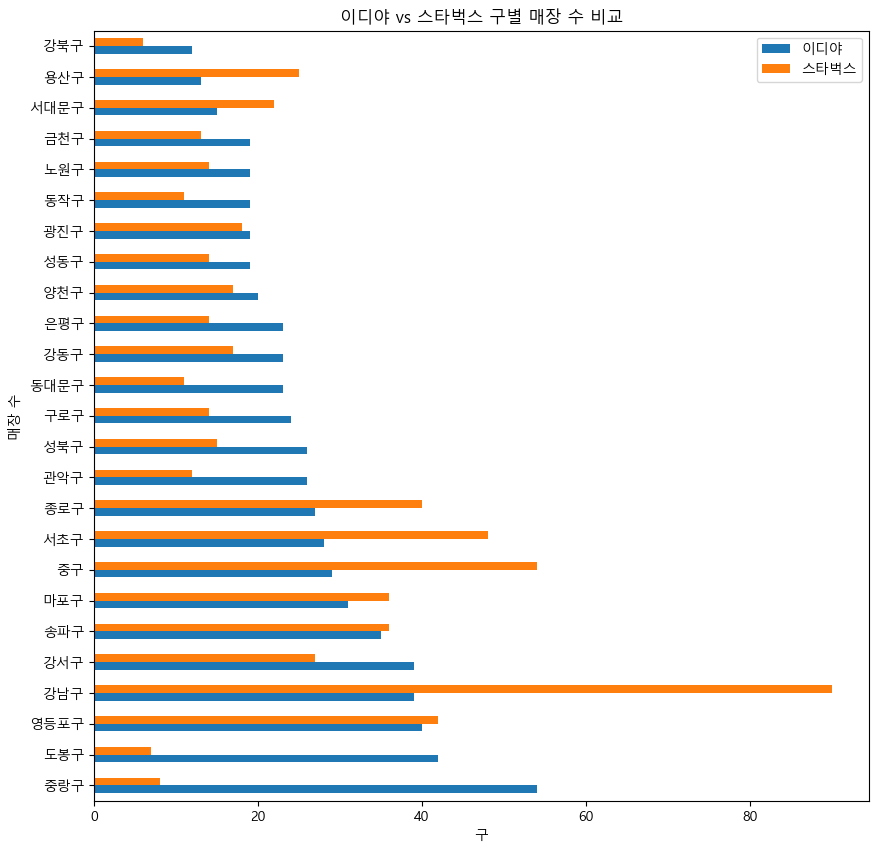

In [31]:
# # df1과 df2는 각각의 데이터프레임을 나타내는 변수

merge_df.plot(x='구', y=['이디야', '스타벅스'], kind='barh',figsize=(10,10) )

plt.title('이디야 vs 스타벅스 구별 매장 수 비교')
plt.xlabel('구')
plt.ylabel('매장 수')
plt.show()

대부분 이디야 커피 매장이 더 많지만 강남 서초 종로 중구 등 회사가 밀집된 지역에는 스타벅스 매장이 많은것으로 보인다. 즉 스타벅스는 회사원들이나 강남과 같은 경제적 여유가 있는 사람들이 많이 이용하는것으로 보인다. 반면 이디야 커피가 월등히 매장수가 많은 중랑구에 대해서 조사해 본 결과 교회가 무척 많은 동네인것으로 보이는데 이디야 커피의 주요 타겟층은 회사원들이 아닌 학생이나 시간적 여유가 있는 사람들인것으로 추측된다.  

In [53]:
merge_df.head()

,구,스타벅스,이디야
0,강남구,90,39
1,중구,54,29
2,서초구,48,28
3,영등포구,42,40
4,종로구,40,27


In [35]:
for idx, rows in tqdm(merge_df.iterrows()):
    station_name = rows.구
    # print(station_name)
    #중구 구청은 너무 많아 서울을 붙임...
    district = '서울' + station_name + '구청' 
    tmp = gmaps.geocode(district, language='ko')
    
    lat = tmp[0].get('geometry')['location']['lat']
    lng = tmp[0].get('geometry')['location']['lng']

    merge_df.loc[idx, 'lat'] = lat
    merge_df.loc[idx, 'lng'] = lng

25it [00:03,  6.45it/s]


In [36]:
merge_df.head()

,구,이디야,스타벅스,lat,lng
0,중랑구,54,8,37.597814,127.092893
1,도봉구,42,7,37.669107,127.032353
2,영등포구,40,42,37.511552,126.927179
3,강남구,39,90,37.496665,127.062980
4,강서구,39,27,37.550910,126.849574


In [37]:
merge_df.describe()

,이디야,스타벅스,lat,lng
count,25.000000,25.000000,25.000000,25.000000
mean,26.560000,24.440000,37.552160,126.992400
std,10.173823,19.144364,0.057419,0.078328
min,12.000000,6.000000,37.460566,126.849574
25%,19.000000,13.000000,37.510006,126.927179
50%,24.000000,17.000000,37.550910,126.995965
75%,31.000000,36.000000,37.594916,127.041301
max,54.000000,90.000000,37.669107,127.147012


In [50]:
m = folium.Map(location=[37.50589466533131, 126.93450729567374], zoom_start=13)

for idx, rows in merge_df.iterrows():
    
    # location 
    lat, lng = rows.lat, rows.lng   

    # 이디야 매장 수 사이클
    folium.Circle(
        location=[lat, lng],
        radius=rows.이디야 * 50, 
        fill=True, 
        color="red",
        fill_color="red",
        tooltip= '서울' + rows.구 + '구청'
    ).add_to(m)
    
# if rows.이디야 >= 25 else "green" 
    
    # 스타벅스 매장 수 사이클
    folium.Circle(
        location=[lat, lng],
        radius=rows.스타벅스 * 50, 
        fill=True, 
        color="blue",
        fill_color="blue",
        tooltip= '서울' + rows.구 + '구청'
    ).add_to(m)

m

위에서 마커로 표시한 것 보다 더 직관적으로 매장수를 비교할수있었습니다.

### 결론
- 이디야 커피는 스타벅스 매장 주변에 새로운 지점을 만드는걸까? 라는 의문은 이디야 커피의 매장수가 많다보니 겹친것으로 추정된다.
- 스타벅스는 경제적 여유가 있는 유동인구가 많은 곳에 많이 위치한것으로 추정 된다.
- 이디야 커피는 서울 곳곳에 왠만큼 균일하게 위치해 있고, 특정 구에는 매장이 많은데 교회나 학교가 밀집된 지역인것으로 보인다. 즉 이디야 커피의 타겟층은 학생이나 시간적 여유가 많은 사람들인 것으로 보인다.